# Linear Regression

In [1]:
# Load dataset
import pandas as pd
cdata = pd.read_stata("https://stats.idre.ucla.edu/stat/data/crime.dta")
cdata.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1.0,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2.0,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3.0,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4.0,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5.0,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [2]:
# Model fit
import statsmodels.formula.api as smf
formula = "crime~poverty+single+murder+pctmetro+pctwhite+pcths"
ols = smf.ols(formula,data=cdata).fit()

## Coefficients

In [3]:
from scientistmetrics import coefficients
coefficients(ols)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1143.7912,584.999,-1.955,0.057,-2322.780,35.197
poverty,15.0068,9.722,1.544,0.130,-4.587,34.601
single,54.8519,21.304,2.575,0.013,11.917,97.787
murder,19.3315,4.444,4.350,0.000,10.375,28.288
pctmetro,6.6218,1.119,5.920,0.000,4.368,8.876
pctwhite,-0.6983,2.505,-0.279,0.782,-5.747,4.350
pcths,4.7913,6.678,0.717,0.477,-8.668,18.250


## Metrics with ols model
### R2

In [4]:
# R - squared
from scientistmetrics import r2_score
r2_score(ols,adjust=False)

0.8950092460587786

### Adjusted R2

In [5]:
# Adjusted r-squared
r2_score(ols,adjust=True)

0.8806923250667938

In [6]:
from scientistmetrics import r2
r2(ols)

{'R2': 0.8950092460587786, 'adj. R2': 0.8806923250667938}

#### Xu R2

In [7]:
from scientistmetrics import r2_xu
r2_xu(ols)

0.8950092460587787

### Mean Squared Error (MSE)

In [8]:
from scientistmetrics import mse
mse(ols)

20027.448984038703

### Root Mean Squared Error (RMSE)

In [9]:
# Root mean squared error
from scientistmetrics import rmse
rmse(ols)

141.51836977593652

In [10]:
# Normalized RMSE
rmse(ols,normalized=True)

0.0498304118929354

### Median Absolute Error (MDAE)

In [11]:
# Median Absolute Error
from scientistmetrics import mdae
mdae(ols)

96.79076994319689

#### Median absolute Percentage Error (MDAPE)

In [12]:
from scientistmetrics import mdape
mdape(ols)

0.1791139533045476

### Max Error

In [13]:
# Max Error
from scientistmetrics import max_error
max_error(ols)

415.1971734188437

### Explained Variance Score

In [14]:
# Explained Variance Score
from scientistmetrics import explained_variance_score
explained_variance_score(ols)

0.8950092460587787

### Mean absolute error

In [15]:
from scientistmetrics import mae
mae(ols)

116.40764521951125

### Mean Absolute Percentage error

In [16]:
from scientistmetrics import mape
mape(ols)

0.26251524299598006

### Others metrics

#### AIC

In [17]:
from scientistmetrics import extractAIC
extractAIC(ols)

663.8795424871918

#### AICC

In [18]:
from scientistmetrics import extractAICC
extractAICC(ols)

666.4841936499824

#### BIC

In [19]:
from scientistmetrics import extractBIC
extractBIC(ols)

677.402321916262

#### Likelihood

In [20]:
from scientistmetrics import logLik
logLik(ols)

-324.9397712435959

### Likelihood Ratio test

#### Full model versus null model

In [21]:
from scientistmetrics import LikelihoodRatioTest
LikelihoodRatioTest(ols)

LikelihoodRatioTestResult(statistic=114.94803251063342, df_denom=6.0, pvalue=1.8722969832734026e-22)

#### Full model versus nested model

In [22]:
ols2 = smf.ols("crime ~ poverty + single", data = cdata).fit()
LikelihoodRatioTest(ols,ols2)

LikelihoodRatioTestResult(statistic=52.30837024703442, df_denom=4.0, pvalue=1.189100321839507e-10)

### Autocorrelation test

In [23]:
from scientistmetrics import check_autocorrelation

#### Durbin - Watson

In [24]:

check_autocorrelation(ols,test ="dw")

1.701742281001304

#### Breusch - Godfrey

In [25]:
check_autocorrelation(ols,test="bg")

{'lm': 7.4384358473101155,
 'lm-pvalue': 0.6835062097907081,
 'fvalue': 0.5805733189976061,
 'f-pvalue': 0.8181297581135918}

#### Newey - West HAC Covariance Matrix Covariance

In [26]:
check_autocorrelation(ols,test="nw")

{'cov':                Intercept      poverty       single      murder    pctmetro  \
 Intercept  198774.310435 -3190.180937  1006.603611  206.754883 -265.088231   
 poverty     -3190.180937   111.311772   -52.177664  -18.068109    2.920557   
 single       1006.603611   -52.177664   596.211933  -96.955787  -15.758682   
 murder        206.754883   -18.068109   -96.955787   26.615979    2.504526   
 pctmetro     -265.088231     2.920557   -15.758682    2.504526    1.492383   
 pctwhite     -395.106568    -8.148921   -18.359849   10.273992    1.722107   
 pcths       -1547.985653    37.800854   -45.405230   -1.820693    1.787481   
 
              pctwhite        pcths  
 Intercept -395.106568 -1547.985653  
 poverty     -8.148921    37.800854  
 single     -18.359849   -45.405230  
 murder      10.273992    -1.820693  
 pctmetro     1.722107     1.787481  
 pctwhite     8.951494    -3.022580  
 pcths       -3.022580    22.067493  ,
 'coef_model_HAC':                  Coef.    Std.Err. 

#### Feasible GLS - Cochrane Orcutt Procedure

In [27]:
check_autocorrelation(ols,test="corc")

{'coef':              Coef.    Std.Err.         t         P>|t|       [0.025  \
 const -1385.748015  566.071326 -2.448010  1.852125e-02 -2527.339640   
 x1       21.908777    9.289153  2.358533  2.296275e-02     3.175416   
 x2       38.291443   21.705456  1.764139  8.481201e-02    -5.481781   
 x3       21.325807    4.435029  4.808493  1.890524e-05    12.381719   
 x4        7.295659    1.177287  6.197011  1.889722e-07     4.921434   
 x5        0.702856    2.406261  0.292095  7.716188e-01    -4.149831   
 x6        6.674360    6.111002  1.092188  2.808324e-01    -5.649650   
 
            0.975]  
 const -244.156391  
 x1      40.642139  
 x2      82.064666  
 x3      30.269896  
 x4       9.669884  
 x5       5.555543  
 x6      18.998370  ,
 'rho': 0.20736213969244727}

#### Ljung - Box / Box - Pierce

In [28]:
check_autocorrelation(ols,test="lb-bp",nlags=1)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.965349,0.325843,0.910707,0.339927


### Heteroscedasticite

In [29]:
from scientistmetrics import check_heteroscedasticity

#### Breusch - Pagan

In [30]:
check_heteroscedasticity(ols,test="bp")

{'lm': 8.12179308378289,
 'lm-pvalue': 0.2293155764013604,
 'fvalue': 1.3890463298551534,
 'f-pvalue': 0.2403680345817599}

#### White test

In [31]:
check_heteroscedasticity(ols,test="white")

{'lm': 34.00168131588642,
 'lm-pvalue': 0.1659985203372701,
 'fvalue': 1.7039564755356738,
 'f-pvalue': 0.09895473322676572}

#### Goldfeld - Quandt

In [32]:
check_heteroscedasticity(ols,test="gq")

{'fvalue': 0.42699115063628096,
 'f-pvalue': 0.9615032668242602,
 'alternative': 'increasing'}

### Normality

In [33]:
from scientistmetrics import check_normality

#### Shapiro test

In [34]:
check_normality(ols,test="shapiro")

NormalityTest(statistic=0.9858171939849854, pvalue=0.7970981597900391)

#### Jarque - Bera test

In [35]:
check_normality(ols,test="jarque-bera")

NormalityTest(statistic=0.31587592270123727, pvalue=0.8539027552989096)

#### Agostino - Pearson test

In [36]:
check_normality(ols,test="agostino")

NormalityTest(statistic=0.7214697252181284, pvalue=0.6971638181602863)

#### Kolmogorov-Smirnov Test

In [37]:
check_normality(ols,test="kstest")

NormalityTest(statistic=0.08506644874021024, pvalue=0.8238027415824155)

### Residuals

In [38]:
from scientistmetrics import residuals

#### Model residuals

In [39]:
residuals(ols,choice="response")

0     170.659449
1      92.108287
2      96.790770
3     -78.344617
4      59.725367
5     -95.062294
6    -154.587557
7      91.249431
8     415.197173
9      -7.813687
10   -137.746751
11    170.731457
12    139.055036
13    183.756730
14    -60.754966
15     88.840521
16     25.064119
17   -177.416359
18    158.234154
19    150.463725
20    -48.309932
21    -55.402855
22   -100.101126
23     84.675536
24   -327.342033
25    -34.558728
26     57.487180
27    -13.082196
28     76.080459
29   -128.821303
30      4.931544
31    231.240088
32    111.973209
33    106.251462
34   -128.549951
35     11.124275
36    -27.695420
37   -151.830337
38   -190.189560
39    270.826840
40     35.068417
41     92.162657
42    -74.221005
43   -178.957489
44   -174.856876
45    -62.451432
46   -153.773873
47   -200.039132
48   -156.124451
49     44.697066
50    -50.361022
dtype: float64

#### Pearson residuals

In [40]:
residuals(ols,choice="pearson")

array([ 1.12010509,  0.60454292,  0.6352759 , -0.51420654,  0.39200107,
       -0.62393123, -1.01461895,  0.59890591,  2.72510237, -0.0512843 ,
       -0.90408611,  1.12057771,  0.9126729 ,  1.2060677 , -0.39875874,
        0.58309528,  0.16450567, -1.16445336,  1.03855299,  0.98755262,
       -0.31707709, -0.36363073, -0.65700307,  0.55575885, -2.14847452,
       -0.22682253,  0.37731097, -0.0858636 ,  0.49934598, -0.84550489,
        0.03236767,  1.51771966,  0.73492422,  0.69737014, -0.8437239 ,
        0.07301299, -0.18177593, -0.99652223, -1.24828889,  1.77754309,
        0.23016782,  0.60489977, -0.48714165, -1.1745684 , -1.14765446,
       -0.40989331, -1.00927842, -1.31293551, -1.02470618,  0.29336443,
       -0.3305392 ])

#### Standardized residuals

In [41]:
from scientistmetrics import rstandard
rstandard(ols,choice="sd_1")

0     1.354346
1     0.635342
2     0.675436
3    -0.535250
4     0.418557
5    -0.659503
6    -1.068856
7     0.621676
8     2.919516
9    -0.055726
10   -1.642545
11    1.172933
12    0.963488
13    1.226225
14   -0.409174
15    0.608015
16    0.178270
17   -1.332229
18    1.084646
19    1.042890
20   -0.336371
21   -0.377618
22   -0.679544
23    0.568139
24   -2.625368
25   -0.243959
26    0.395558
27   -0.091023
28    0.519389
29   -0.876505
30    0.034195
31    1.644099
32    0.777585
33    0.718504
34   -0.863815
35    0.077804
36   -0.186785
37   -1.035457
38   -1.373735
39    1.872424
40    0.241817
41    0.630608
42   -0.501059
43   -1.242952
44   -1.212011
45   -0.447490
46   -1.066451
47   -1.332830
48   -1.149936
49    0.313348
50   -1.428568
dtype: float64

#### Leave - one out CV residuals

In [42]:
rstandard(ols,choice="predictive")

0     249.500998
1     101.732547
2     109.415196
3     -84.888333
4      68.091733
5    -106.210684
6    -171.556427
7      98.319799
8     476.552175
9      -9.225827
10   -454.669876
11    187.058002
12    154.970490
13    189.950311
14    -63.970027
15     96.596435
16     29.433793
17   -232.224174
18    172.591420
19    167.798500
20    -54.368085
21    -59.747047
22   -107.087711
23     88.489983
24   -488.789246
25    -39.977957
26     63.181818
27    -14.701575
28     82.310439
29   -138.440717
30      5.503955
31    271.353719
32    125.350206
33    112.789065
34   -134.745077
35     12.632037
36    -29.242915
37   -163.926465
38   -230.336206
39    300.510671
40     38.707833
41    100.162990
42    -78.522378
43   -200.401876
44   -195.017623
45    -74.433244
46   -171.688951
47   -206.147397
48   -196.616447
49     50.993784
50   -940.698066
dtype: float64

### Overall performance

In [43]:
from scientistmetrics import model_performance
model_performance(ols,metrics="all")

AIC                   663.879542
AICC                  666.484194
BIC                   677.402322
r2 score                0.895009
r2 score adj.           0.880692
expl. var. score        0.895009
mae                   116.407645
mdae                   96.790770
mse                 20027.448984
rmse                  141.518370
mape                    0.262515
Name: statistics, dtype: float64

### Model check

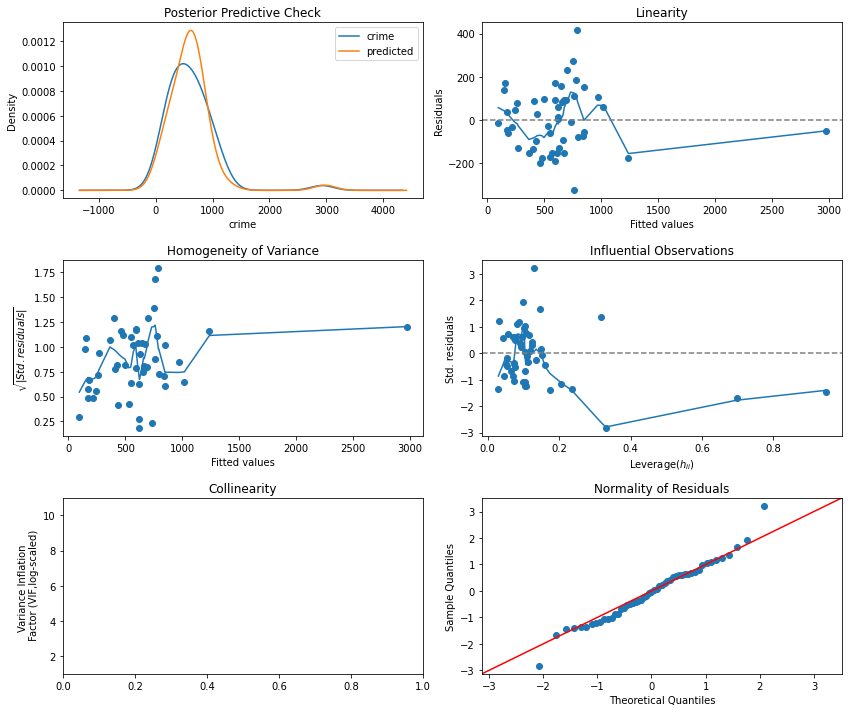

In [44]:
from scientistmetrics import check_model
check_model(ols)

## Test

In [45]:
#test de normalité de Jarque-Bera
pred = ols.predict(cdata)
pred.head(6)

0     590.340551
1     687.891713
2     496.209230
3     793.344617
4    1018.274633
5     662.062294
dtype: float64

### y-pred and y-true

In [46]:
y_true = cdata["crime"]
y_pred = pred

### Metrics

#### R2

In [47]:
r2_score(y_true=y_true,y_pred=y_pred)

0.8950092460587787

#### Mean Squared Error (MSE)

In [48]:
mse(y_true=y_true,y_pred=y_pred)

20027.448984038703

#### Root Mean Squared Error (RMSE)

In [49]:
rmse(y_true=y_true,y_pred=y_pred)

141.51836977593652

#### Median Absolute Error

In [50]:
mdae(y_true=y_true,y_pred=y_pred)

96.79076994319689

#### Max Error

In [51]:
max_error(y_true=y_true,y_pred=y_pred)

415.1971734188437

#### Explained variance score

In [52]:
explained_variance_score(y_true=y_true,y_pred=y_pred)

0.8950092460587787

#### Mean Absolute Error

In [53]:
mae(y_true=y_true,y_pred=y_pred)

116.40764521951125

#### Mean Absolute Percentage Error (MAPE)

In [54]:
mape(y_true=y_true,y_pred=y_pred)

0.26251524299598006

## Power set

In [55]:
# Powerset model
D = cdata.drop(["sid","state"],axis="columns")
D.head()

,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [56]:
# Powerset model
from scientistmetrics import powersetmodel
ols_res = powersetmodel(DTrain=D,target="crime",split_data=False,model_type="linear")
# All metrics
ols_metrics = ols_res[1]
ols_metrics

,predictor,count,aic,aicc,bic,rsquared,adj. rsquared,expl. var. score,max error,mae,mape,mse,rmse,mdae,r2,likelihood test ratio
0,murder,1,690.352940,690.602940,694.216591,0.785344,0.780963,0.785344,586.863507,161.371705,0.471231,40946.586017,202.352628,132.535344,0.785344,36.473397
1,pctmetro,1,750.929328,751.179328,754.792979,0.295978,0.281610,0.295978,1952.755114,236.831837,0.534550,134295.252241,366.463166,165.623628,0.295978,97.049785
2,pctwhite,1,737.537251,737.787251,741.400902,0.458567,0.447517,0.458567,1325.462675,199.074242,0.519812,103280.749315,321.373224,130.338886,0.458567,83.657708
3,pcths,1,765.369230,765.619230,769.232881,0.065563,0.046492,0.065563,2246.070207,276.167106,0.775603,178248.044015,422.194320,250.123618,0.065563,111.489688
4,poverty,1,753.498887,753.748887,757.362539,0.259598,0.244488,0.259598,1713.931234,256.737941,0.693566,141234.873248,375.812285,178.824440,0.259598,99.619345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,single+pctmetro+poverty+pctwhite+murder,5,662.472719,664.381810,674.063673,0.893781,0.881979,0.893781,432.925169,116.020051,0.265207,20261.746450,142.343762,85.330373,0.893781,0.593177
59,single+pctmetro+poverty+murder+pcths,5,661.969552,663.878643,673.560506,0.894824,0.883138,0.894824,417.052534,116.823116,0.264064,20062.826649,141.643308,99.024292,0.894824,0.090010
60,single+poverty+pctwhite+murder+pcths,5,691.759317,693.668407,703.350270,0.811377,0.790419,0.811377,639.993966,139.532876,0.393967,35980.664747,189.685700,103.203991,0.811377,29.879774
61,single+pctmetro+poverty+pctwhite+pcths,5,680.121517,682.030608,691.712471,0.849862,0.833179,0.849862,533.262377,133.387053,0.300104,28639.576804,169.232316,108.470517,0.849862,18.241975


## mtcars dataset

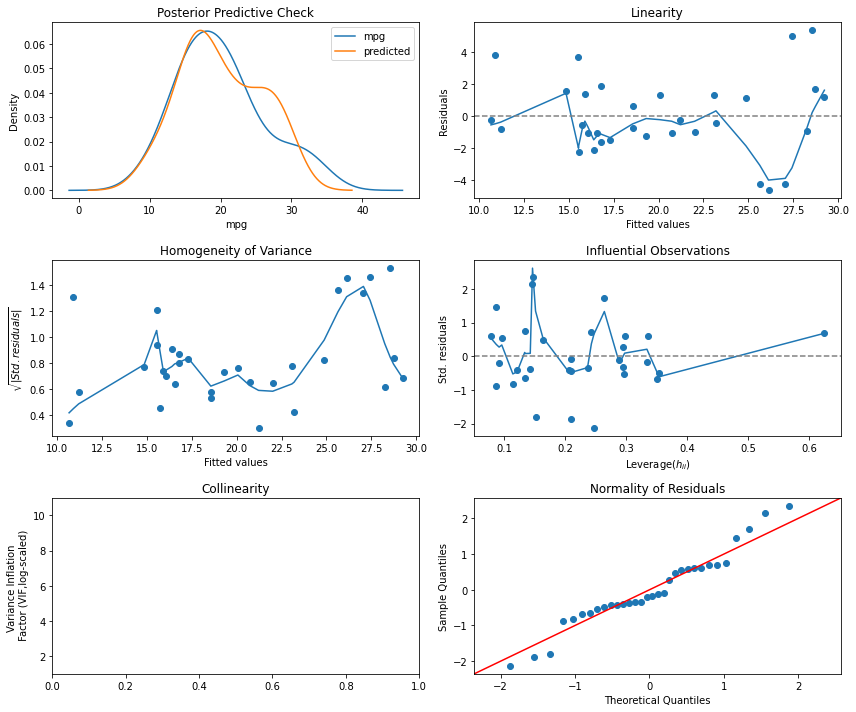

In [57]:
from plotnine.data import mtcars
mtcars = mtcars.set_index("name")
ols3 = smf.ols("mpg ~ wt + am + gear + vs * cyl",data=mtcars).fit()
check_model(ols3)

### Model compare

In [58]:
from scientistmetrics import compare_performance
compare_performance(model=[ols,ols2,ols3])

,Name,aic,aicc,bic,Log-Likelihood,r2,adj. r2,mse,rmse,mae,mape,mdae,mdape,sigma
Model 1,ols,663.879542,666.484194,677.402322,-324.939771,0.895009,0.880692,20027.448984,141.518370,116.407645,0.262515,96.790770,0.179114,152.360212
Model 2,ols,708.187913,708.698551,713.983390,-351.093956,0.707189,0.694989,55854.947125,236.336512,175.670264,0.438146,116.802912,0.225418,243.610101
Model 3,ols,159.835695,164.502362,170.095846,-72.917848,0.841380,0.803311,5.581672,2.362556,1.867327,0.093429,1.329402,0.069252,2.672927
